In [1]:
import cv2

# Inicializar la cámara
cap = cv2.VideoCapture(0)

# Capturar una imagen
ret, frame = cap.read()

# Guardar la imagen capturada
image_path = 'captured_image.jpg'
cv2.imwrite(image_path, frame)

# Liberar la cámara
cap.release()
cv2.destroyAllWindows()

print("Imagen capturada y guardada en 'captured_image.jpg'")


Imagen capturada y guardada en 'captured_image.jpg'


In [1]:
!pip install ultralytics onnx matplotlib pillow requests numpy

   ---------------------------------------- 0.0/14.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.4 MB 445.2 kB/s eta 0:00:33
   ---------------------------------------- 0.1/14.4 MB 469.7 kB/s eta 0:00:31
   ---------------------------------------- 0.1/14.4 MB 525.1 kB/s eta 0:00:28
   ---------------------------------------- 0.1/14.4 MB 655.8 kB/s eta 0:00:22
    --------------------------------------- 0.2/14.4 MB 831.5 kB/s eta 0:00:18
    --------------------------------------- 0.2/14.4 MB 860.2 kB/s eta 0:00:17
    --------------------------------------- 0.3/14.4 MB 842.9 kB/s eta 0:00:17
   - -------------------------------------- 0.4/14.4 MB 1.1 MB/s eta 0:00:13
   - -------------------------------------- 0.5/14.4 MB 1.2 MB/s eta 0:00:13
   - -------------------------------------- 0.5/14.4 MB 1.2 MB/s eta 0:00:13
   - -------------------------------------- 0.6/14.4 MB 1.2 MB/s eta 0:00:12

In [2]:
!pip install ultralytics
!pip install dill
!pip install supervision
!pip install onnx

In [3]:
import zipfile

# Ruta del archivo ZIP
zip_file_path = 'C:/Users/USUARIO_PC/Downloads/datasetecuador.zip'
# Ruta donde se extraerán los archivos
extract_path = 'C:/Users/USUARIO_PC/Downloads/datasetecuador'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Archivo descomprimido con éxito")


Archivo descomprimido con éxito


In [4]:
import os

# Directorios de imágenes y etiquetas
train_label_dir = 'C:/Users/USUARIO_PC/Downloads/datasetecuador/labels/train/'
val_label_dir = 'C:/Users/USUARIO_PC/Downloads/datasetecuador/labels/val/'
train_image_dir = 'C:/Users/USUARIO_PC/Downloads/datasetecuador/images/train/'
val_image_dir = 'C:/Users/USUARIO_PC/Downloads/datasetecuador/images/val/'

# Mapear clases inválidas a clases válidas
class_mapping = {
    15: 0,
    16: 1,
    17: 2,
    18: 3,
    19: 4
}

# Función para revisar y corregir etiquetas
def check_and_correct_labels(label_dir):
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        if label_file.endswith('.txt'):
            with open(label_path, 'r') as f:
                lines = f.readlines()

            corrected_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id in class_mapping:
                    new_class_id = class_mapping[class_id]
                    corrected_line = ' '.join([str(new_class_id)] + parts[1:]) + '\n'
                    corrected_lines.append(corrected_line)
                    print(f"Info: Changed class {class_id} to {new_class_id} in file {label_file}.")
                else:
                    corrected_lines.append(line)

            # Reescribir el archivo con las etiquetas corregidas
            with open(label_path, 'w') as f:
                f.writelines(corrected_lines)

# Ejecutar la función para corregir etiquetas en ambos conjuntos de entrenamiento y validación
check_and_correct_labels(train_label_dir)
check_and_correct_labels(val_label_dir)


In [5]:
data_config = """
train: C:/Users/USUARIO_PC/Downloads/datasetecuador/images/train
val: C:/Users/USUARIO_PC/Downloads/datasetecuador/images/val

nc: 5
names: ['condorandino', 'iguanamarina', 'lobomarino', 'pinzondarwin', 'tortugagigante']
"""

with open('C:/Users/USUARIO_PC/Downloads/datasetecuador/ecuador.yaml', 'w') as f:
    f.write(data_config)


In [6]:
import os

# Directorios de etiquetas
train_label_dir = 'C:/Users/USUARIO_PC/Downloads/datasetecuador/labels/train/'
val_label_dir = 'C:/Users/USUARIO_PC/Downloads/datasetecuador/labels/val/'

# Función para revisar y corregir etiquetas
def check_and_correct_labels(label_dir):
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        if label_file.endswith('.txt'):
            with open(label_path, 'r') as f:
                lines = f.readlines()

            corrected_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id in range(5):  # Asegurarse de que las clases estén en el rango 0-4
                    corrected_lines.append(line)
                else:
                    print(f"Warning: Invalid class {class_id} in file {label_file}. Removing this line.")

            # Reescribir el archivo con las etiquetas corregidas
            with open(label_path, 'w') as f:
                f.writelines(corrected_lines)

# Ejecutar la función para revisar etiquetas en ambos conjuntos de entrenamiento y validación
check_and_correct_labels(train_label_dir)
check_and_correct_labels(val_label_dir)


In [7]:
!pip install onnx

In [8]:
import sys
print(sys.executable)


C:\Users\USUARIO_PC\anaconda3\envs\yolov10_env\python.exe


In [9]:
from ultralytics import YOLO

import matplotlib.pyplot as pp
import supervision as sv
from io import BytesIO # Librería para manipular bytes de datos en memoria
from PIL import Image # Estructura que representa la imagen en el paquete PIL
import requests
import numpy as np
import onnx
model = YOLO('yolov10n.pt')
model.train(data='C:/Users/USUARIO_PC/Downloads/datasetecuador/ecuador.yaml', epochs=50)



New https://pypi.org/project/ultralytics/8.2.58 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.56  Python-3.11.9 torch-2.3.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov10n.pt, data=C:/Users/USUARIO_PC/Downloads/datasetecuador/ecuador.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

train: Scanning C:\Users\USUARIO_PC\Downloads\dataset

train: New cache created: C:\Users\USUARIO_PC\Downloads\datasetecuador\labels\train.cache



val: Scanning C:\Users\USUARIO_PC\Downloads\datasetec

val: New cache created: C:\Users\USUARIO_PC\Downloads\datasetecuador\labels\val.cache


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G        1.6      8.864      2.6
                 Class     Images  Instances      Box

                   all         50         65     0.0136      0.952      0.273      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       1.46      8.189      2.5
                 Class     Images  Instances      Box

                   all         50         65    0.00899        0.9      0.221       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.572      7.729       2.
                 Class     Images  Instances      Box

                   all         50         65    0.00837      0.973      0.227      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.783      6.893      2.6
                 Class     Images  Instances      Box

                   all         50         65    0.00768      0.961      0.321      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.772      6.404      2.7
                 Class     Images  Instances      Box

                   all         50         65     0.0121      0.911      0.298      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.807      6.187      2.7
                 Class     Images  Instances      Box

                   all         50         65      0.447      0.198      0.168      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.882      5.837      2.7
                 Class     Images  Instances      Box

                   all         50         65    0.00389      0.868      0.231      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.893      5.628      2.7
                 Class     Images  Instances      Box

                   all         50         65      0.719     0.0821      0.331      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.866       5.42      2.6
                 Class     Images  Instances      Box

                   all         50         65      0.596      0.296      0.467      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.848      5.372      2.6
                 Class     Images  Instances      Box

                   all         50         65      0.484      0.401      0.466       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.915      5.032      2.6
                 Class     Images  Instances      Box

                   all         50         65      0.491      0.279      0.263      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.848      4.954      2.6
                 Class     Images  Instances      Box

                   all         50         65      0.532      0.485      0.507      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.954       4.76      2.6
                 Class     Images  Instances      Box

                   all         50         65      0.606      0.391      0.468      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.735       4.46      2.5
                 Class     Images  Instances      Box

                   all         50         65      0.569      0.572      0.606      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.749      4.389      2.5
                 Class     Images  Instances      Box

                   all         50         65      0.491      0.494      0.549      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G       1.81      4.339      2.6
                 Class     Images  Instances      Box

                   all         50         65      0.457      0.453      0.474       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.701      4.029      2.4
                 Class     Images  Instances      Box

                   all         50         65      0.647      0.587      0.606      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.759      4.162      2.6
                 Class     Images  Instances      Box

                   all         50         65      0.633      0.562      0.595      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.685      3.876      2.4
                 Class     Images  Instances      Box

                   all         50         65      0.633      0.599      0.643      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.615      3.638      2.4
                 Class     Images  Instances      Box

                   all         50         65       0.56      0.601      0.587      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.676      3.614      2.4
                 Class     Images  Instances      Box

                   all         50         65      0.677      0.603      0.681      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.496      3.337      2.4
                 Class     Images  Instances      Box

                   all         50         65      0.697      0.685      0.776      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.625      3.554      2.4
                 Class     Images  Instances      Box

                   all         50         65      0.675      0.692      0.705      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G       1.64      3.318      2.4
                 Class     Images  Instances      Box

                   all         50         65      0.734      0.636      0.693      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.533      3.231       2.
                 Class     Images  Instances      Box

                   all         50         65      0.698       0.69      0.722      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.525      2.981       2.
                 Class     Images  Instances      Box

                   all         50         65      0.616      0.598      0.701      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.454       2.98       2.
                 Class     Images  Instances      Box

                   all         50         65      0.659      0.657      0.682      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.457      3.044      2.3
                 Class     Images  Instances      Box

                   all         50         65      0.823      0.626       0.74      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.474      2.843      2.3
                 Class     Images  Instances      Box

                   all         50         65      0.846      0.519      0.704      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.433       2.81      2.3
                 Class     Images  Instances      Box

                   all         50         65       0.81      0.628      0.734      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.464      2.925      2.3
                 Class     Images  Instances      Box

                   all         50         65      0.746       0.76      0.801      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.445      2.739      2.3
                 Class     Images  Instances      Box

                   all         50         65      0.669      0.727      0.784      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.478       2.81       2.
                 Class     Images  Instances      Box

                   all         50         65      0.657      0.734      0.789      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.369       2.57      2.2
                 Class     Images  Instances      Box

                   all         50         65      0.795      0.659      0.787      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.384      2.544      2.2
                 Class     Images  Instances      Box

                   all         50         65      0.639      0.766      0.763      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.319      2.528      2.2
                 Class     Images  Instances      Box

                   all         50         65      0.813      0.677      0.748      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.268      2.469      2.2
                 Class     Images  Instances      Box

                   all         50         65      0.771      0.673      0.752      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.296       2.41      2.2
                 Class     Images  Instances      Box

                   all         50         65      0.718      0.739      0.756      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.337      2.402      2.2
                 Class     Images  Instances      Box

                   all         50         65      0.746      0.638      0.742      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.263      2.291      2.2
                 Class     Images  Instances      Box

                   all         50         65      0.754      0.748      0.778       0.61


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9695      3.504      2.0
                 Class     Images  Instances      Box

                   all         50         65      0.834      0.685      0.782      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9333      3.359      2.0
                 Class     Images  Instances      Box

                   all         50         65      0.743      0.742      0.777      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9493       3.31         
                 Class     Images  Instances      Box

                   all         50         65      0.848      0.753      0.814      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.8431      3.111      1.9
                 Class     Images  Instances      Box

                   all         50         65      0.781       0.71      0.786      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8656      3.086      2.0
                 Class     Images  Instances      Box

                   all         50         65      0.773      0.676      0.787       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.8717      3.082      1.9
                 Class     Images  Instances      Box

                   all         50         65      0.809      0.715      0.802      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      0.808      2.877      1.9
                 Class     Images  Instances      Box

                   all         50         65      0.828      0.711      0.828      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.7885      2.888      1.9
                 Class     Images  Instances      Box

                   all         50         65      0.879      0.683      0.829      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.751      2.783      1.8
                 Class     Images  Instances      Box

                   all         50         65       0.87      0.768      0.847      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8262      2.807      1.8
                 Class     Images  Instances      Box

                   all         50         65      0.853      0.738      0.841      0.678



50 epochs completed in 3.048 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 5.8MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 5.8MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.2.56  Python-3.11.9 torch-2.3.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
YOLOv10n summary (fused): 285 layers, 2,696,366 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box


                   all         50         65      0.847      0.765      0.844      0.681
          condorandino         10         12      0.752      0.833      0.817      0.616
          iguanamarina         10         10      0.867      0.658      0.904      0.805
            lobomarino         10         19          1      0.656      0.751      0.512
          pinzondarwin         10         10      0.817      0.891      0.937      0.786
        tortugagigante         10         14      0.797      0.786      0.812      0.687
Speed: 2.8ms preprocess, 245.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\detect\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021104F03A10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    

In [1]:
from ultralytics import YOLO
from PIL import Image
import torch
import time

# Cargar el modelo entrenado
model = YOLO('yolov10n.pt')

# Cargar la imagen capturada
image = Image.open('captured_image.png')


In [3]:
%matplotlib inline


Using device: cpu

0: 384x640 4 birds, 199.0ms
Speed: 4.0ms preprocess, 199.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Tiempo de inferencia con CPU: 0.2909 segundos


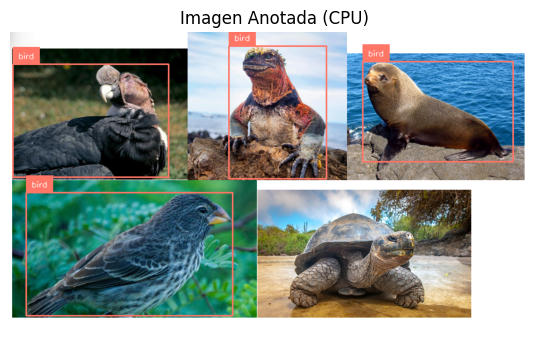

In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import torch
import time
import numpy as np
import supervision as sv

# Verificar si CUDA está disponible, pero forzar el uso de CPU
device_cpu = torch.device('cpu')
print(f"Using device: {device_cpu}")

# Cargar el modelo entrenado
model = YOLO('yolov10n.pt').to(device_cpu)

# Cargar la imagen capturada
image_path = 'captured_image.png'
img = Image.open(image_path).convert('RGB')  # Cargar la imagen
image = np.array(img)  # Convertir la imagen en una representación de NumPy

# Medir el tiempo de inferencia con CPU
start_time = time.time()
results_cpu = model(img)
end_time = time.time()
cpu_inference_time = end_time - start_time
print(f"Tiempo de inferencia con CPU: {cpu_inference_time:.4f} segundos")

# Obtener las detecciones para CPU
results_cpu = results_cpu[0]
detections_cpu = sv.Detections.from_ultralytics(results_cpu)

# Anotadores de bounding boxes y etiquetas
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Anotar la imagen para CPU
annotated_image_cpu = box_annotator.annotate(scene=image, detections=detections_cpu)
annotated_image_cpu = label_annotator.annotate(scene=annotated_image_cpu, detections=detections_cpu)

# Mostrar la imagen original y la imagen anotada lado a lado
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 2)
plt.imshow(annotated_image_cpu)
plt.axis('off')
plt.title('Imagen Anotada (CPU)')

plt.show()


In [ ]:
# Comparar los tiempos de inferencia
print(f"Diferencia de tiempo (GPU - CPU): {gpu_inference_time - cpu_inference_time:.4f} segundos")
